# Get information out of CPM tcpdumps

Refer to official CPM specifications from ETSI for the meanings and definitions for the values.

In [1]:
import pyshark
import numpy as np
import matplotlib.pyplot as plt

## Import tcpdump file containing CPM packets

In [119]:
# Name of tcpdump file (.pcap file)
pcap_file = "./pcap/tcpdump_autowarev2x_sender.pcap"

# Import using pyshark (Python wrapper of tshark)
cap = pyshark.FileCapture(pcap_file, display_filter='its', use_json=True)

### Get number of packets in file

In [94]:
# Check the number of packets
cap_length = len([p for p in cap])
print(f"Number of packets in '{pcap_file}' file: {cap_length}")

Number of packets in './pcap/tcpdump_autowarev2x_sender.pcap' file: 1180


### Get field names of the ITS layer of a packet

In [44]:
# Print the field names of the ITS layer of the 600th packet
cap[600].its.field_names

['ItsPduHeader_element', 'CollectivePerceptionMessage_element']

### Get the CPM element

In [120]:
# Get the CPM data frame
cpm = cap[600].its.CollectivePerceptionMessage_element

# Print the field names of the cpm
cpm.field_names

['generationDeltaTime', 'cpmParameters_element']

### Get the cpmParameters element for a CPM

In [121]:
# Get the cpmParameters
cpm_parameters = cpm.cpmParameters_element

# Print the field names of cpmParameters
cpm_parameters.field_names

['extension_present_bit',
 'extension_bit',
 'numberOfPerceivedObjects',
 'perceivedObjectContainer_tree',
 'choice_index',
 'sequence_of_length',
 'stationDataContainer_tree',
 'stationDataContainer',
 'perceivedObjectContainer',
 'managementContainer_element',
 'optional_field_bit']

### Get numberOfPerceivedObjects

In [106]:
# Get numberOfPerceivedObjects
cpm_parameters.numberOfPerceivedObjects

'7'

### Get the perceivedObjectContainer for a cpmParameters element

In [117]:
# Get perceivedObjectContainer
pOC = cpm_parameters.perceivedObjectContainer_tree

### Get all perceivedObjects for a perceivedObjectContainer

In [179]:
# Get perceivedObjects
perceivedObjects = []
for pObj in list(pOC._all_fields.keys()):
    perceivedObjects.append(pOC.get(pObj).PerceivedObject_element)

### Get an attribute for a perceivedObject

In [185]:
# Get xDistance value of perceivedObject
perceivedObjects[0].xDistance_element.value

'1641'

### Get all CPMs

In [188]:
cpms = []
for pkt in cap:
    cpm = pkt.its.CollectivePerceptionMessage_element
    cpms.append(cpm)

## Examples

### Graph the numOfPerceivedObjects

In [208]:
obj_count = []
n = list(range(len(cpms)))
for cpm in cpms:
    obj_count.append(int(cpm.cpmParameters_element.numberOfPerceivedObjects))

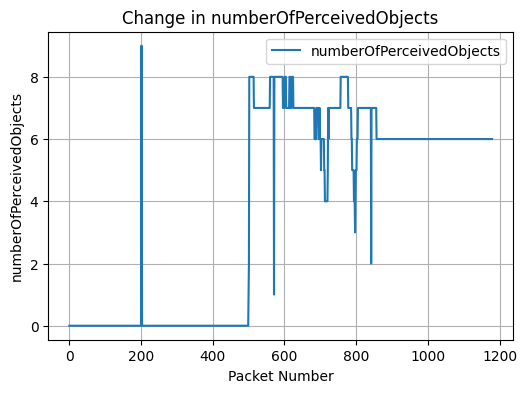

In [225]:
fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(1, 1, 1)
ax.plot(n, obj_count, label='numberOfPerceivedObjects')
ax.set_ylabel('numberOfPerceivedObjects')
ax.set_xlabel('Packet Number')
ax.set_title('Change in numberOfPerceivedObjects')
ax.grid()
ax.legend()

### Plot the xDistance, yDistance values of ObjectID=2 perceivedObjects

In [294]:
# Plot the xDistance, yDistance values of perceivedObject with ObjectID=2
vals_x = [[x,None] for x in range(len(cpms))]
vals_y = [[x,None] for x in range(len(cpms))]
for i, cpm in enumerate(cpms):
    try:
        pOC = cpm.cpmParameters_element.perceivedObjectContainer_tree
        for pObj_item in list(pOC._all_fields.keys()):
            pObj = pOC.get(pObj_item).PerceivedObject_element
            if int(pObj.objectID) == 2:
                vals_x[i][1] = float(pObj.xDistance_element.value)
                vals_y[i][1] = float(pObj.yDistance_element.value)
    except:
        continue

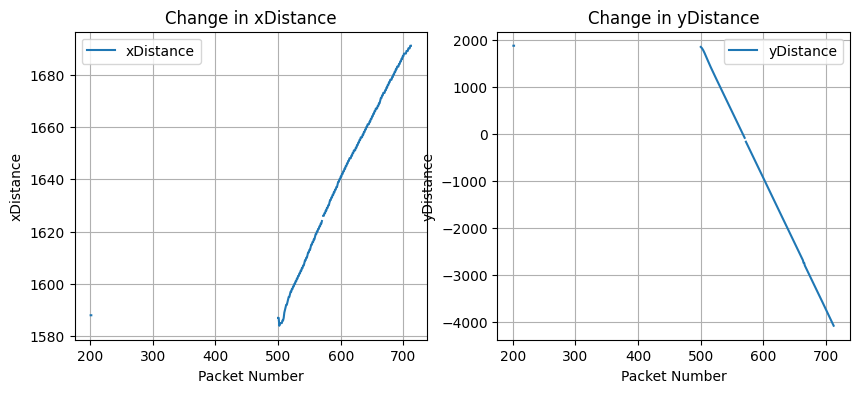

In [292]:
fig = plt.figure(figsize=[10,4])
ax = fig.add_subplot(1, 2, 1)
ax.plot(*zip(*vals_x), label='xDistance')
ax.set_ylabel('xDistance')
ax.set_xlabel('Packet Number')
ax.set_title('Change in xDistance')
ax.grid()
ax.legend()
ax = fig.add_subplot(1, 2, 2)
ax.plot(*zip(*vals_y), label='yDistance')
ax.set_ylabel('yDistance')
ax.set_xlabel('Packet Number')
ax.set_title('Change in yDistance')
ax.grid()
ax.legend()